In [1]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/original/PB2002_steps.csv'
tectonic_data = pd.read_csv(url)

# Display the first few rows
tectonic_data.head()


,SeqNum,PlateBoundIdentifer,PlateBoundContinuity,StartLong,StartLat,FinalLong,FinalLat,StepLength(km),AzimuthCenter,VelocityLeft,VelocityAzimuth,VelocityDivergent,VelocityRightLateral,Elevation,SeafloorAge,StepClass,StepContinuity,Orogen
0,1,AF-AN,False,-0.438,-54.852,-0.039,-54.677,32.1,53,13.2,48,1.2,13.1,-1584,2,OTF,False,False
1,2,AF-AN,True,-0.039,-54.677,0.443,-54.451,40.0,51,13.2,47,0.9,13.1,-1639,5,OTF,True,False
2,3,AF-AN,True,0.443,-54.451,0.965,-54.832,54.0,142,13.2,47,13.1,-1.1,-1687,4,OSR,False,False
3,4,AF-AN,True,0.965,-54.832,1.695,-54.399,67.3,44,13.2,46,-0.4,13.2,-4289,1,OTF,False,False
4,5,AF-AN,True,1.695,-54.399,2.360,-54.037,59.0,47,13.2,45,0.4,13.2,-4517,2,OTF,True,False


In [2]:
import geopandas as gpd
from shapely.geometry import LineString

# Create a GeoDataFrame
tectonic_data['geometry'] = list(zip(tectonic_data['StartLong'], tectonic_data['StartLat'], tectonic_data['FinalLong'], tectonic_data['FinalLat']))
tectonic_data['geometry'] = tectonic_data['geometry'].apply(lambda x: LineString([(x[0], x[1]), (x[2], x[3])]))
gdf = gpd.GeoDataFrame(tectonic_data, geometry='geometry')

# Display the GeoDataFrame
gdf.head()

,SeqNum,PlateBoundIdentifer,PlateBoundContinuity,StartLong,StartLat,FinalLong,FinalLat,StepLength(km),AzimuthCenter,VelocityLeft,VelocityAzimuth,VelocityDivergent,VelocityRightLateral,Elevation,SeafloorAge,StepClass,StepContinuity,Orogen,geometry
0,1,AF-AN,False,-0.438,-54.852,-0.039,-54.677,32.1,53,13.2,48,1.2,13.1,-1584,2,OTF,False,False,"LINESTRING (-0.43800 -54.85200, -0.03900 -54.6..."
1,2,AF-AN,True,-0.039,-54.677,0.443,-54.451,40.0,51,13.2,47,0.9,13.1,-1639,5,OTF,True,False,"LINESTRING (-0.03900 -54.67700, 0.44300 -54.45..."
2,3,AF-AN,True,0.443,-54.451,0.965,-54.832,54.0,142,13.2,47,13.1,-1.1,-1687,4,OSR,False,False,"LINESTRING (0.44300 -54.45100, 0.96500 -54.83200)"
3,4,AF-AN,True,0.965,-54.832,1.695,-54.399,67.3,44,13.2,46,-0.4,13.2,-4289,1,OTF,False,False,"LINESTRING (0.96500 -54.83200, 1.69500 -54.39900)"
4,5,AF-AN,True,1.695,-54.399,2.360,-54.037,59.0,47,13.2,45,0.4,13.2,-4517,2,OTF,True,False,"LINESTRING (1.69500 -54.39900, 2.36000 -54.03700)"


C:\Users\imran\AppData\Local\Temp\ipykernel_37044\2599062753.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


AttributeError: module 'fiona' has no attribute 'path'

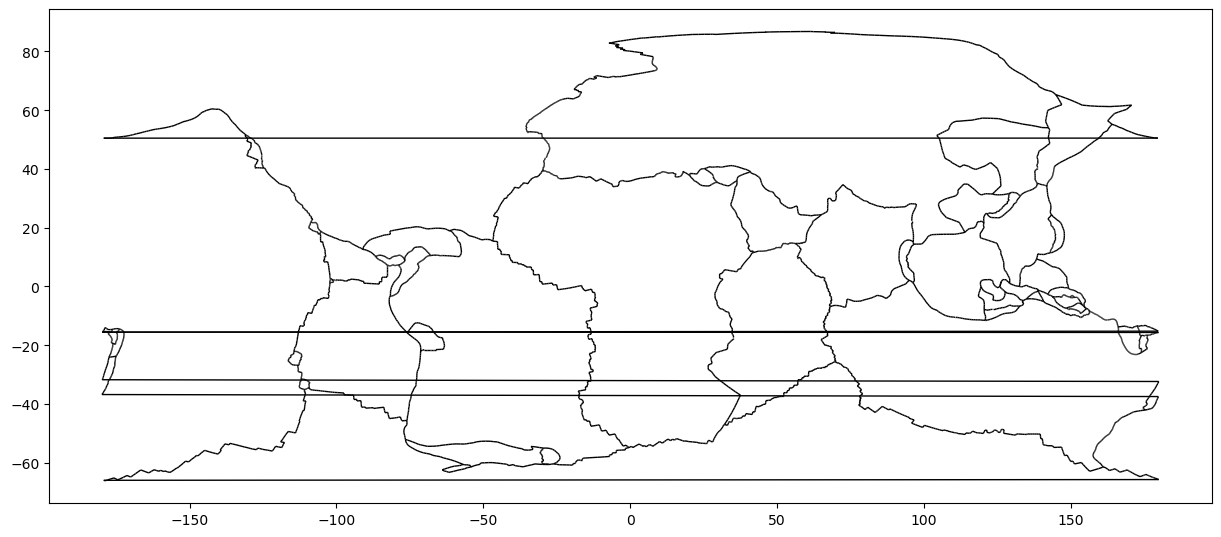

In [3]:
import matplotlib.pyplot as plt

# Create a plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the tectonic plate boundaries
gdf.plot(ax=ax, linewidth=1, edgecolor='black')

# Add base map from Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1)

# Add titles and labels
plt.title('Tectonic Plate Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the URL
url = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/original/PB2002_boundaries.dig.txt"
tectonic_plates2 = pd.read_csv(url, delim_whitespace=True, header=None, names=["Longitude", "Latitude"])

# Filter the data for the Indonesia region
indonesia_plates2 = tectonic_plates2[(tectonic_plates['Latitude'] >= -5) & (tectonic_plates['Latitude'] <= 17) &
                                   (tectonic_plates['Longitude'] >= 84) & (tectonic_plates['Longitude'] <= 135)]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(tectonic_plates2['Longitude'], tectonic_plates2['Latitude'], color='blue', label='Tectonic Plate Boundary')
plt.plot(indonesia_plates2['Longitude'], indonesia_plates2['Latitude'], color='red', label='Indonesia Plate Boundary')
plt.title('Tectonic Plate Boundaries Affecting Indonesia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

C:\Users\imran\AppData\Local\Temp\ipykernel_37044\2760830654.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tectonic_plates = pd.read_csv(url, delim_whitespace=True, header=None, names=["Longitude", "Latitude"])


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

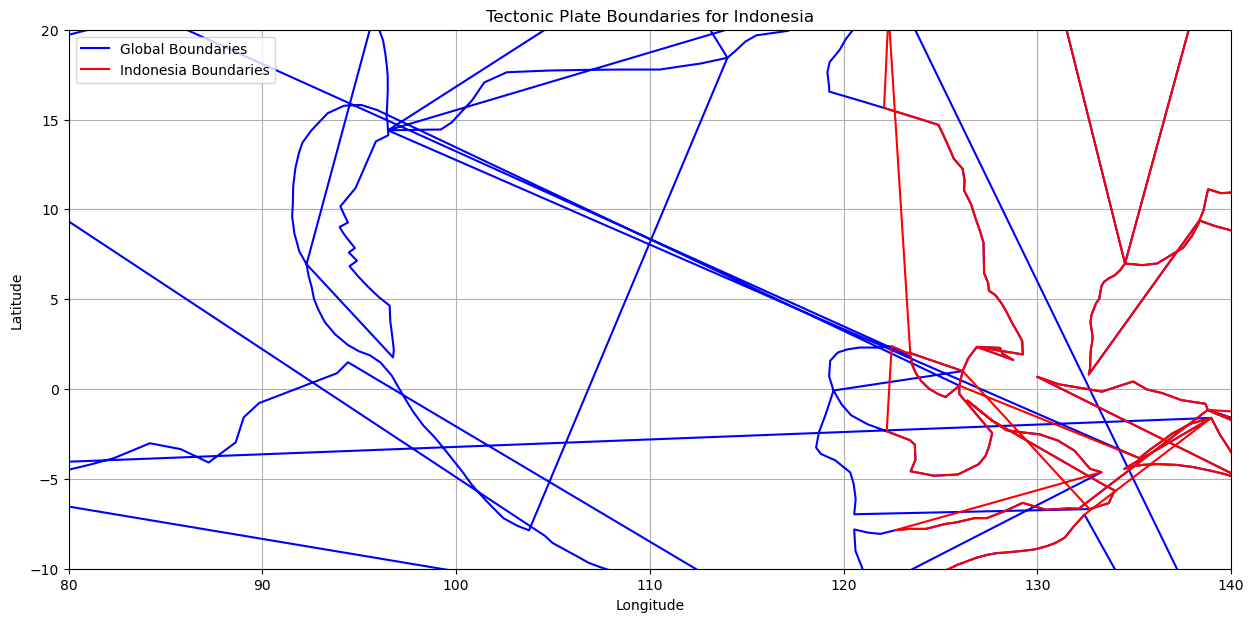

In [10]:
# Filter data for the Indonesia region
indonesia_region = tectonic_data[(tectonic_data['StartLat'] >= -5) &
                                 (tectonic_data['StartLat'] <= 17) &
                                 (tectonic_data['StartLong'] >= 84) &
                                 (tectonic_data['StartLong'] <= 135)]

# Plotting the tectonic plate boundaries
plt.figure(figsize=(15, 7))
plt.plot(tectonic_data['StartLong'], tectonic_data['StartLat'], linestyle='-', color='blue', label='Global Boundaries')
plt.plot(indonesia_region['StartLong'], indonesia_region['StartLat'], linestyle='-', color='red', label='Indonesia Boundaries')
plt.xlim(80, 140)
plt.ylim(-10, 20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tectonic Plate Boundaries for Indonesia')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
indonesia_region.to_csv('indonesia_region.csv', index=False)

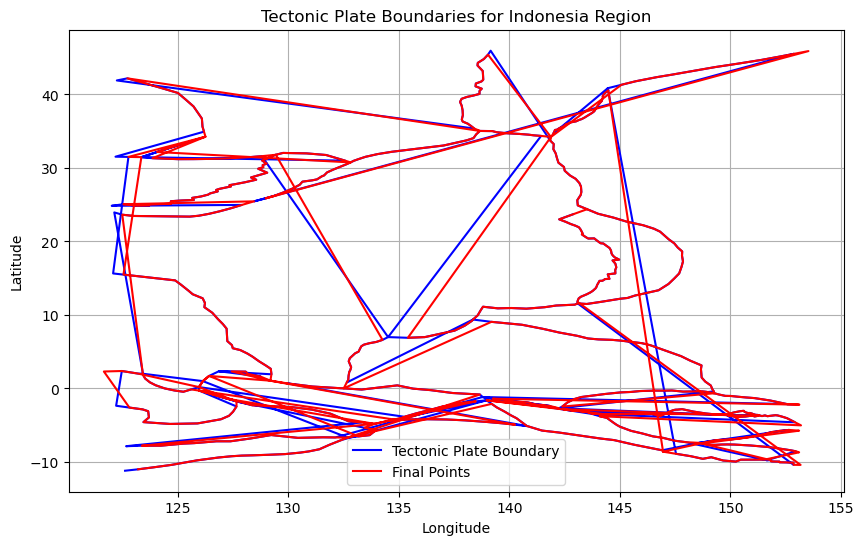

In [12]:
# Plotting the tectonic plate boundaries for Indonesia
plt.figure(figsize=(10, 6))
plt.plot(indonesia_region['StartLong'], indonesia_region['StartLat'], 'b-', label='Tectonic Plate Boundary')
plt.plot(indonesia_region['FinalLong'], indonesia_region['FinalLat'], 'r-', label='Final Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tectonic Plate Boundaries for Indonesia Region')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG_V2.tsv'
earthquake_data = pd.read_csv(bmkg_file_path, sep='\t')

# Plot the geographic distribution of earthquakes with tectonic plates
plt.figure(figsize=(14, 10))
plt.scatter(earthquake_data['longitude'], earthquake_data['latitude'], alpha=0.5, s=1)

# Plotting the tectonic plate boundaries for Indonesia
plt.figure(figsize=(10, 6))
plt.plot(indonesia_region['StartLong'], indonesia_region['StartLat'], 'b-', label='Tectonic Plate Boundary')
plt.plot(indonesia_region['FinalLong'], indonesia_region['FinalLat'], 'r-', label='Final Points')

# Customizing plot
plt.title('Geographic Distribution of Earthquakes with Tectonic Plates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'longitude'

<Figure size 1400x1000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG_V2.tsv'
earthquake_data = pd.read_csv(bmkg_file_path, sep='\t')

# Load the tectonic plates data
plates_file_path = '/content/indonesia_region.csv'
plates_data = pd.read_csv(plates_file_path)

# Plot the geographic distribution of earthquakes with tectonic plates in the same figure
plt.figure(figsize=(14, 10))

# Scatter plot for earthquakes
plt.scatter(earthquake_data['longitude'], earthquake_data['latitude'], alpha=0.5, s=1, label='Earthquakes')

# Plotting tectonic plate boundaries
plt.plot(plates_data['StartLong'], plates_data['StartLat'], 'b-', label='Tectonic Plate Boundary')
plt.plot(plates_data['FinalLong'], plates_data['FinalLat'], 'r-', label='Final Points')

# Customizing plot
plt.title('Geographic Distribution of Earthquakes with Tectonic Plates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/indonesia_region.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the tectonic plate boundary data
tectonic_plate_data = pd.read_csv('/content/indonesia_region.csv')

# Extract earthquake data (use your actual earthquake data here)
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG_V2.tsv'
earthquake_data = pd.read_csv(bmkg_file_path, sep='\t')
# Plotting the tectonic plate boundaries
plt.figure(figsize=(14, 8))

# Plot the earthquake data
#plt.scatter(earthquake_data['Longitude'], earthquake_data['Latitude'], s=1, label='Earthquakes', alpha=0.6)

# Plot the tectonic plate boundaries
for i, row in tectonic_plate_data.iterrows():
    plt.plot([row['StartLong'], row['FinalLong']], [row['StartLat'], row['FinalLat']], color='blue', label='Tectonic Plate Boundary' if i == 0 else "")

# Add labels and legend
plt.title('Geographic Distribution of Earthquakes with Tectonic Plates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Define the geographic scope for Indonesia
plt.xlim(84, 135)
plt.ylim(-17, 17)

# Save and show the plot
plt.savefig('/mnt/data/Indonesia_Tectonic_Plates.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(-84 <= lon <= 135 and -5 <= lat <= 17 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Plot the boundaries
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tectonic Plate Boundaries Affecting Indonesia')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.show()


In [ ]:
import csv

with open('indonesia_boundaries.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(indonesia_boundaries)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(-84 <= lon <= 135 and -5 <= lat <= 17 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG.csv'
bmkg_data = pd.read_csv(bmkg_file_path)
print(bmkg_data.columns)


# Plot the boundaries and BMKG earthquake data
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red', label='Tectonic Plate Boundaries')

plt.scatter(bmkg_data['lon'], bmkg_data['lat'], s=1, color='blue', label='Earthquakes')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Earthquakes with Tectonic Plate Boundaries')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/PB2002_boundaries.dig.txt'

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(90 <= lon <= 140 and -15 <= lat <= 15 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG.csv'
bmkg_data = pd.read_csv(bmkg_file_path)

# Plot the boundaries and BMKG earthquake data
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

plt.scatter(bmkg_data['lon'], bmkg_data['lat'], s=1, color='blue', label='Earthquakes')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Earthquakes with Tectonic Plate Boundaries')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend(['Tectonic Plate Boundaries', 'Earthquakes'])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/PB2002_boundaries.dig.txt'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG.csv'
bmkg_data = pd.read_csv(bmkg_file_path)


plt.scatter(bmkg_data['lon'], bmkg_data['lat'], s=1, color='blue', label='Earthquakes')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Earthquakes')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend(['Earthquakes'])
plt.show()


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(90 <= lon <= 140 and -15 <= lat <= 15 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Load the BMKG earthquake data
bmkg_file_path = '/content/Earthquakes in Indonesia BMKG.csv'
bmkg_data = pd.read_csv(bmkg_file_path)

# Plot the boundaries and BMKG earthquake data
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

#plt.scatter(bmkg_data['lon'], bmkg_data['lat'], s=1, color='blue', label='Earthquakes')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Tectonic Plate Boundaries')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend(['Tectonic Plate Boundaries'])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/PB2002_boundaries.dig.txt'

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(90 <= lon <= 140 and -15 <= lat <= 15 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Load the BMKG earthquake data
tsunami_file_path = '/content/DATA PALEOTSUNAMI INDONESIA 08_06_2024 23_12_03.csv'
tsunami_data = pd.read_csv(tsunami_file_path)

# Plot the boundaries and BMKG earthquake data
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

plt.scatter(tsunami_data['Latitude'], tsunami_data['Longitude'], color='blue', label='Tsunami')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Tsunamis with Tectonic Plate Boundaries')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend(['Tectonic Plate Boundaries', 'Tsunamis'])
plt.show()

import matplotlib.pyplot as plt

# Plotting the Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(tsunami_data['Longitude'], tsunami_data['Latitude'], c='blue', marker='o')
plt.title('Geographical Distribution of Paleotsunami Data in Indonesia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/PB2002_boundaries.dig.txt'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the PB2002_boundaries.dig.txt data
file_path = '/content/PB2002_boundaries.dig.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter data for Indonesia region
indonesia_boundaries = []
for boundary in boundaries:
    if any(90 <= lon <= 140 and -15 <= lat <= 15 for lon, lat in boundary):
        indonesia_boundaries.append(boundary)

# Load the BMKG earthquake data
tsunami_file_path = '/content/NOAA_Tsunamis - NOAA_Tsunamis.csv'
tsunami_data = pd.read_csv(tsunami_file_path)

# Plot the boundaries and BMKG earthquake data
plt.figure(figsize=(10, 8))
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

plt.scatter(tsunami_data['Latitude'], tsunami_data['Longitude'], color='blue', label='Tsunami')

# Add details to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Tsunamis with Tectonic Plate Boundaries')
plt.xlim([90, 140])
plt.ylim([-15, 15])
plt.grid(True)
plt.legend(['Tectonic Plate Boundaries', 'Tsunamis'])
plt.show()

import matplotlib.pyplot as plt

# Plotting the Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(tsunami_data['Longitude'], tsunami_data['Latitude'], c='blue', marker='o')
plt.title('Geographical Distribution of Paleotsunami Data in Indonesia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



# Create the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# First subplot for boundaries and earthquake data
for boundary in indonesia_boundaries:
    lons, lats = zip(*boundary)
    axs[0].plot(lons, lats, color='red')

axs[0].scatter(tsunami_data['Longitude'], tsunami_data['Latitude'], color='blue', label='Tsunami')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Geographic Distribution of Tsunamis with Tectonic Plate Boundaries')
axs[0].set_xlim([90, 140])
axs[0].set_ylim([-15, 15])
axs[0].grid(True)
axs[0].legend(['Tectonic Plate Boundaries', 'Tsunamis'])

# Second subplot for the scatter plot of tsunami data
axs[1].scatter(tsunami_data['Longitude'], tsunami_data['Latitude'], c='blue', marker='o')
axs[1].set_title('Geographical Distribution of Paleotsunami Data in Indonesia')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [16]:
japan_data = pd.read_csv('CNN-GRU-JMA/japan_data.csv')

C:\Users\imran\AppData\Local\Temp\ipykernel_37044\3528215496.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


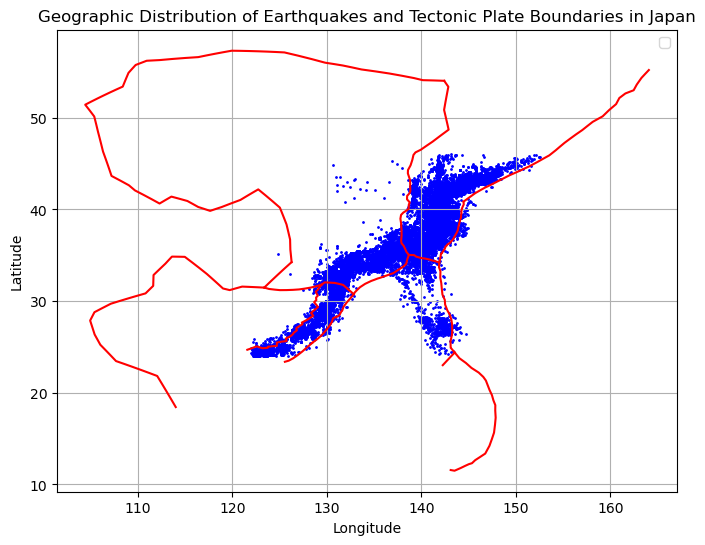

In [21]:
# Load and filter tectonic plate boundaries data for Japan region
with open('PB2002_boundaries.dig.txt', 'r') as file:
    lines = file.readlines()

# Parse tectonic plate boundaries data
boundaries = []
boundary = []
for line in lines:
    if "*** end of line segment ***" in line:
        if boundary:
            boundaries.append(boundary)
        boundary = []
    elif line.strip():
        parts = line.split(',')
        if len(parts) == 2:
            try:
                lon, lat = float(parts[0]), float(parts[1])
                boundary.append((lon, lat))
            except ValueError:
                continue

# Filter boundaries relevant to Japan region
japan_boundaries = []
for boundary in boundaries:
    if any(122 <= lon <= 153 and 24 <= lat <= 46 for lon, lat in boundary):
        japan_boundaries.append(boundary)

# Plot earthquake data and tectonic plate boundaries
plt.figure(figsize=(8, 6))

# Plot earthquake data
plt.scatter(japan_data['Longitude'], japan_data['Latitude'], s=1, color='blue')

# Plot tectonic plate boundaries
for boundary in japan_boundaries:
    lons, lats = zip(*boundary)
    plt.plot(lons, lats, color='red')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Earthquakes and Tectonic Plate Boundaries in Japan')
plt.legend()
plt.grid(True)
plt.show()
